In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#read data set

data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checkimg data

data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
# data shape

data.shape
#Showing data columns Data Type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:

data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#showing some details about data

data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
np.max(data.Year)

2018

In [ ]:
# find the maximum Year in data set


# convert Year to Age of each cars

Age = 2023 - data.Year

data.insert(0, "Age", Age)
data.drop('Year', axis = 1, inplace = True)
data

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,7,city,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,8,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,14,city,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,6,city,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# Liệt kê các giá trị khác nhau của các cột
data.agg(['nunique'])

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
nunique,16,98,156,147,206,3,2,2,3


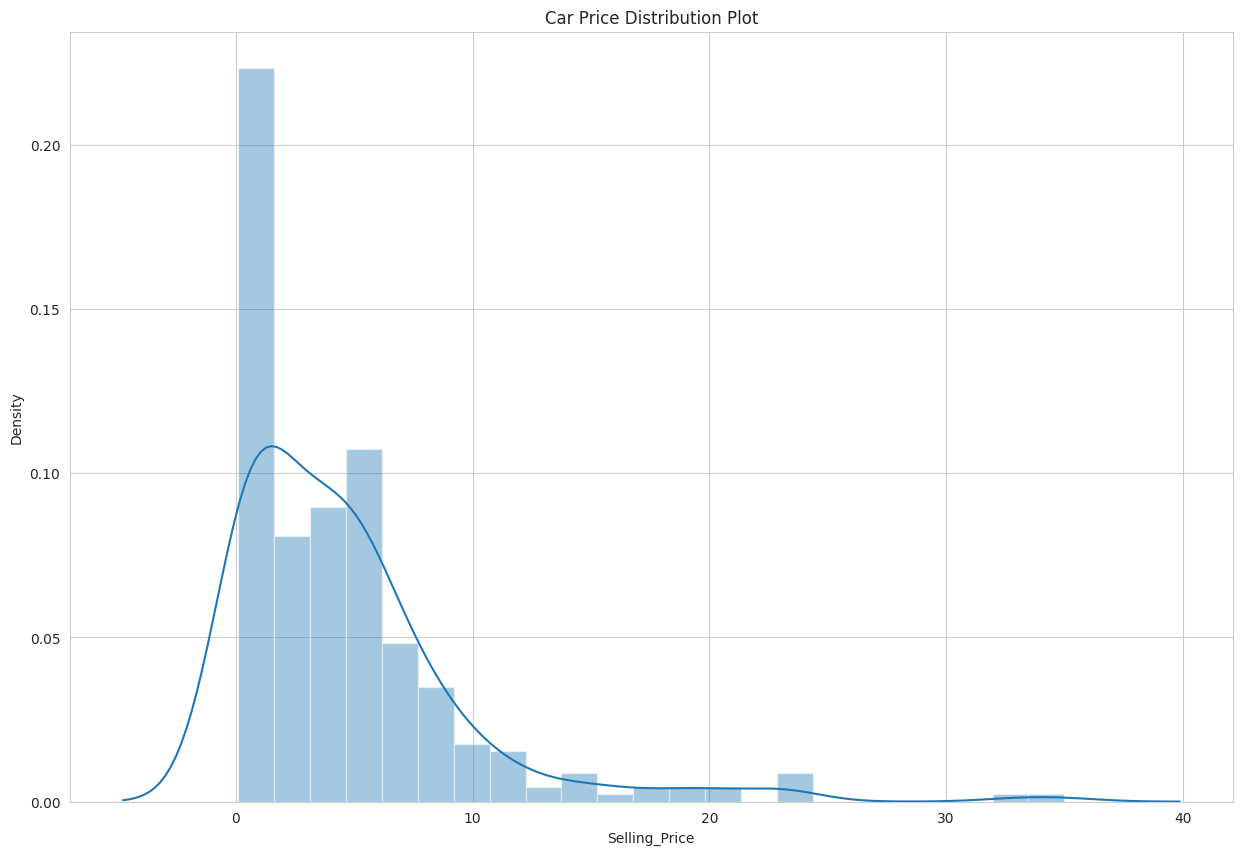

In [ ]:
# Draw distribution diagram for Selling Price

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Selling_Price)
plt.title('Car Price Distribution Plot')
plt.show()

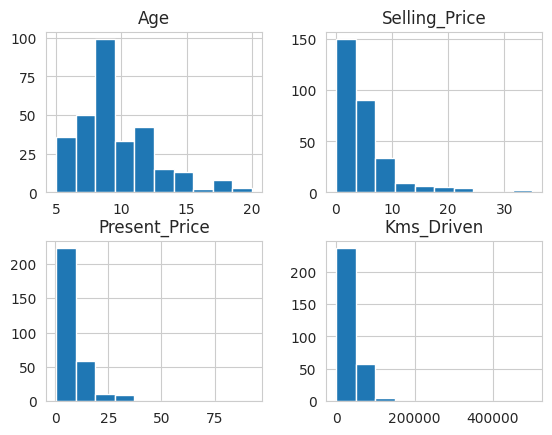

In [ ]:
cdf = data[['Age','Selling_Price','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

#viz = cdf[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']]
viz = cdf[['Age','Selling_Price','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']]
viz.hist(),

plt.show()


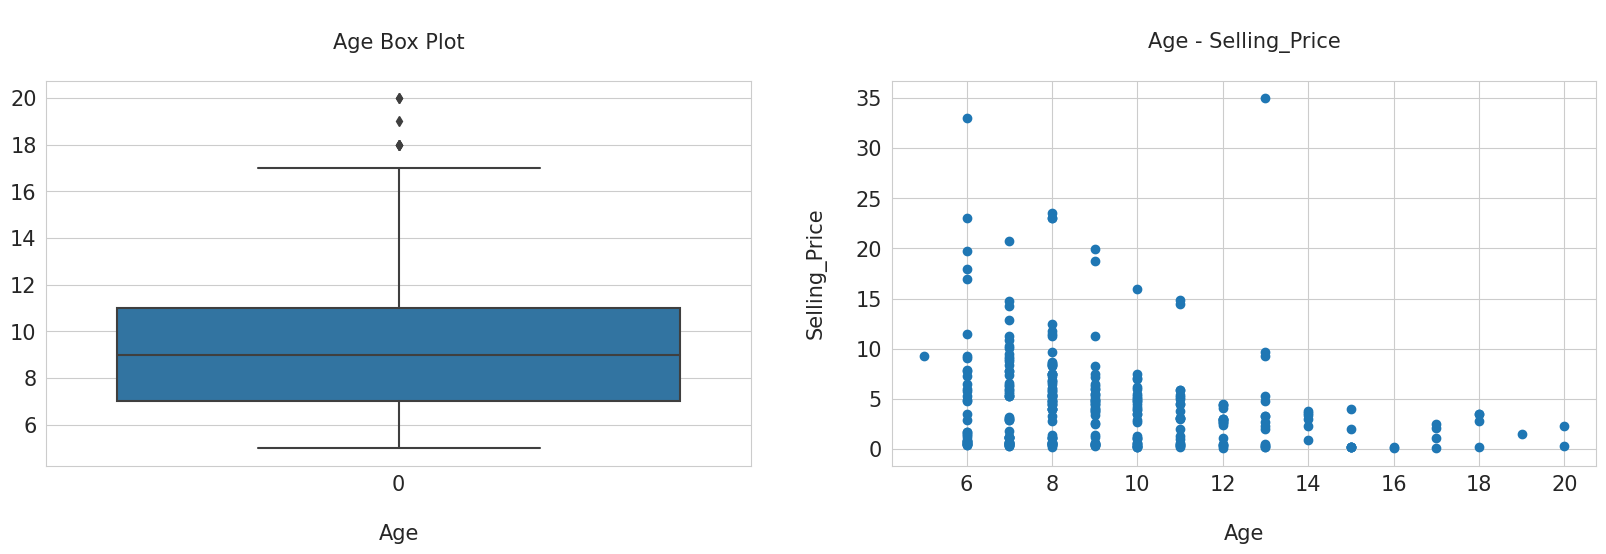

In [ ]:
def Numerical_Plot(column):

        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        sns.boxplot(data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.scatter(data[column], data.Selling_Price)
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Selling_Price\n", fontsize = 15)
        plt.ylabel("Selling_Price\n", fontsize=15)

        plt.show()
        print()
Numerical_Plot("Age")

In [ ]:
# showing feature values

print("Fuel Type    = ", data.Fuel_Type.unique(),"\n")
print("Seller Type  = ", data.Seller_Type.unique(), "\n")
print("Transmission = ", data.Transmission.unique(), "\n")
print("Owner        = ", data.Owner.unique(), "\n")
data

Fuel Type    =  ['Petrol' 'Diesel' 'CNG'] 

Seller Type  =  ['Dealer' 'Individual'] 

Transmission =  ['Manual' 'Automatic'] 

Owner        =  [0 1 3] 



,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,7,city,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,8,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,14,city,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,6,city,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
data["Fuel_Type"].replace({'Petrol':2, 'Diesel':3, 'CNG':4},inplace = True)
data["Seller_Type"].replace({'Dealer':2, 'Individual':3}, inplace = True)
data["Transmission"].replace({'Manual':2, 'Automatic':3}, inplace = True)
# data.drop("Car_Name", axis=1, inplace = True)

data

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,ritz,3.35,5.59,27000,2,2,2,0
1,10,sx4,4.75,9.54,43000,3,2,2,0
2,6,ciaz,7.25,9.85,6900,2,2,2,0
3,12,wagon r,2.85,4.15,5200,2,2,2,0
4,9,swift,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...
296,7,city,9.50,11.60,33988,3,2,2,0
297,8,brio,4.00,5.90,60000,2,2,2,0
298,14,city,3.35,11.00,87934,2,2,2,0
299,6,city,11.50,12.50,9000,3,2,2,0


In [ ]:
# cheking the features changes

print("Fuel Type    = ", pd.unique(data["Fuel_Type"]))
print("Seller Type  = ", pd.unique(data["Seller_Type"]))
print("Transmission = ", pd.unique(data["Transmission"]))
print("Owner        = ", pd.unique(data["Owner"]))

Fuel Type    =  [2 3 4]
Seller Type  =  [2 3]
Transmission =  [2 3]
Owner        =  [0 1 3]


In [ ]:
#Showing data columns Data Type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    int64  
 1   Car_Name       301 non-null    object 
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [ ]:
x = pd.DataFrame(data, columns = ['Age','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = data['Selling_Price'].values.reshape(-1, 1)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)


In [ ]:
len(X_train)

240

In [ ]:
len(X_test)

61

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, Y_train)
print("Accuracy: ", clf.score(X_test, Y_test))

Accuracy:  0.9134181721224436


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import scikit-learn libraries
from sklearn.model_selection import KFold
from sklearn import linear_model

kf5 = KFold(n_splits=10, shuffle=False)
model = linear_model.LinearRegression()

train_x = np.asanyarray(data[['Age','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']])
train_y = np.asanyarray(data[['Selling_Price']])
# print(np.shape(train_x))
# print(np.shape(train_y))
i = 1
for train_index, test_index in kf5.split(train_x):
    X_train =train_x[train_index]
    X_test = train_x[test_index]
    y_train =train_y[train_index]
    y_test = train_y[test_index]

    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {r2_score(y_test, model.predict(X_test))}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.6635221412090643
Accuracy for the fold no. 2 on the test set: 0.880842763405518
Accuracy for the fold no. 3 on the test set: 0.7237084634846102
Accuracy for the fold no. 4 on the test set: 0.863126108357125
Accuracy for the fold no. 5 on the test set: -43.648830574639256
Accuracy for the fold no. 6 on the test set: -1079.4423128548365
Accuracy for the fold no. 7 on the test set: -0.3501290707207556
Accuracy for the fold no. 8 on the test set: 0.7843785816011973
Accuracy for the fold no. 9 on the test set: 0.8279757833601054
Accuracy for the fold no. 10 on the test set: 0.874089252359589


In [ ]:
print("R2-score: %.2f" % r2_score(y_test , model.predict(X_test) ))

R2-score: 0.87
